In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

class Neural_Network(object):
    def __init__(self):
        #Define Parameters
        self.inputLayerSize = 2
        self.outputLayerSize=1
        self.hiddenLayerSize=3
        
        #Define Weights
        self.W1=np.random.rand(self.inputLayerSize,self.hiddenLayerSize)
        self.W2=np.random.rand(self.hiddenLayerSize,self.outputLayerSize)
        
   

    def forward(self,X):
        #Propagate inputs through network
        self.z2 = np.dot(X,self.W1)
        self.a2 = self.sigmoid(self.z2)
        self.z3 = np.dot(self.a2,self.W2)
        yHat = self.sigmoid(self.z3)
        return yHat
    
    def sigmoid(self, z):
        #Apply Sigmoid Activation Function
        return 1/(1+np.exp(-z))
    
    def sigmoidPrime(self,z):
        #Derivative of Sigmoid Function
        return np.exp(-z)/((1+np.exp(-z))**2)
    
    def costFunction(self, X, y):
        #Compute Cost Function with weights already stored in class
        self.yHat=self.forward(X)
        J=0.5*sum((y-self.yHat)**2)
        return J
    
    def costFunctionPrime(self, X, y):
        #Compute derivatives with respect to W1 and W2
        self.yHat=self.forward(X)
        delta3 = np.multiply(-(y-self.yHat),self.sigmoidPrime(self.z3))
        dJdW2=np.dot(self.a2.T,delta3)
        delta2=np.dot(delta3,self.W2.T)*self.sigmoidPrime(self.z2)
        dJdW1=np.dot(X.T,delta2)
        return dJdW1,dJdW2

In [2]:
X=np.array(([3,5],[5,1],[10,1]),dtype=float)
y=np.array(([75],[80],[93]),dtype=float)

In [3]:
X

array([[ 3.,  5.],
       [ 5.,  1.],
       [10.,  1.]])

In [4]:
y #answer

array([[75.],
       [80.],
       [93.]])

In [5]:
X=X/np.amax(X,axis=0)
y=y/100

In [6]:
X,y


(array([[0.3, 1. ],
        [0.5, 0.2],
        [1. , 0.2]]),
 array([[0.75],
        [0.8 ],
        [0.93]]))

In [7]:
NN=Neural_Network()

In [8]:
yH=NN.forward(X)

In [9]:
yH

array([[0.73101061],
       [0.7192052 ],
       [0.74626236]])

In [10]:
y

array([[0.75],
       [0.8 ],
       [0.93]])

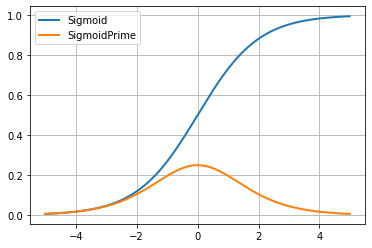

In [11]:
testValues=np.arange(-5,5,0.01)
plt.plot(testValues,NN.sigmoid(testValues),linewidth=2)
plt.plot(testValues, NN.sigmoidPrime(testValues),linewidth=2)
plt.grid(1)
plt.legend(['Sigmoid','SigmoidPrime'])
#u=NN.sigmoidPrime(testValues)


In [12]:
NN=Neural_Network()

In [13]:
cost1=NN.costFunction(X,y)

In [14]:
dJdW1,dJdW2=NN.costFunctionPrime(X,y)

In [15]:
dJdW1

array([[-0.00440161, -0.00265527, -0.01439573],
       [-0.00148308, -0.00091192, -0.00481558]])

In [16]:
dJdW2

array([[-0.04906394],
       [-0.04421233],
       [-0.04153439]])

In [17]:
scalar= 30
NN.W1 = NN.W1+scalar*dJdW1
NN.W2 = NN.W2+scalar*dJdW2
cost2 = NN.costFunction(X,y)
print (cost1,cost2)

[0.03109995] [0.62784011]


In [18]:
scalar=3
NN.W1 = NN.W1-scalar*dJdW1
NN.W2 = NN.W2-scalar*dJdW2
cost3 = NN.costFunction(X,y)
print (cost2,cost3)

[0.62784011] [0.56092123]


In [19]:
n= 2500
array=[]
x=np.arange(0,n)

for i in range(n):
    dJdW1, dJdW2 = NN.costFunctionPrime(X,y)
    NN.W1 = NN.W1 - scalar*dJdW1
    NN.W2 = NN.W2 - scalar*dJdW2
    cost = NN.costFunction(X, y)
    array.append(cost)
print(cost)

[0.00178209]


Text(0.5, 1.0, 'Cost v.s. Iteration')

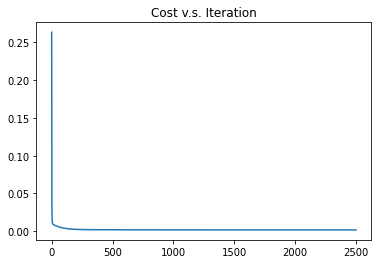

In [20]:
plt.plot(x,array)
plt.title('Cost v.s. Iteration')

In [21]:
y

array([[0.75],
       [0.8 ],
       [0.93]])

In [22]:
scalar=15
stats = []

NN=Neural_Network()
cost=NN.costFunction(X,y)

while (cost > 0.000001): 
    dJdW1,dJdW2=NN.costFunctionPrime(X,y) 
    NN.W1 = NN.W1-scalar*dJdW1
    NN.W2 = NN.W2-scalar*dJdW2
    cost = NN.costFunction(X,y) 
    stats.append(cost)
    
    if (scalar > 4): 
        scalar -= 1

yHat = NN.forward(X)
        
yHat

array([[0.7496793 ],
       [0.80094003],
       [0.92899356]])

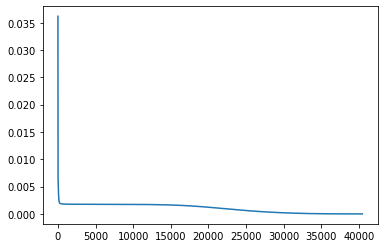

In [23]:
plt.plot(stats)

In [24]:
# This neural network minimizes the cost to 0.000001 using batch gradient descent. 
# The learning rate is designedto get smaller as it makes progress towards the target value.
# This approach helps to filter out local minimums and focus on the global minimum.